<a href="https://colab.research.google.com/github/dannnn30/data-mining-_-daniel/blob/main/Praktikum_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniel Yohanis Oematan - 0706022210060

In [50]:
#Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dannnn30/data-mining-_-daniel/refs/heads/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#describe dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#cek null value
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


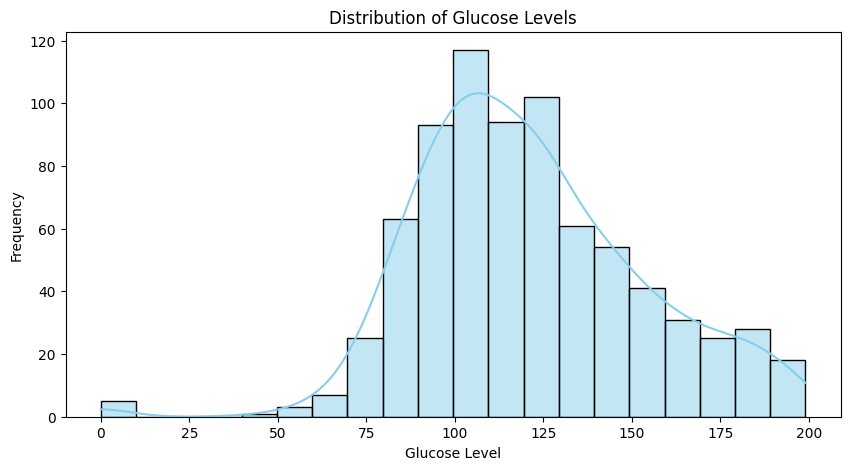

Menunjukkan distribusi kadar glukosa, dengan puncak sekitar 100-150, menunjukkan kebanyakan pasien berada pada rentang tersebut


In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Glucose'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()
print("Menunjukkan distribusi kadar glukosa, dengan puncak sekitar 100-150, menunjukkan kebanyakan pasien berada pada rentang tersebut")

<ipython-input-18-2916a6168909>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette='pastel')


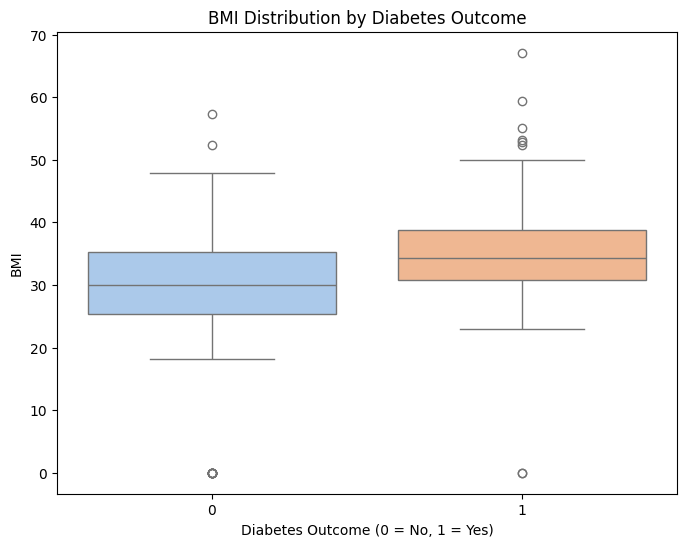

Memperlihatkan distribusi BMI untuk pasien dengan dan tanpa diabetes. Rata-rata BMI pasien dengan diabetes terlihat lebih tinggi


In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=df, palette='pastel')
plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()
print("Memperlihatkan distribusi BMI untuk pasien dengan dan tanpa diabetes. Rata-rata BMI pasien dengan diabetes terlihat lebih tinggi")

In [19]:
#split X dan y
x = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

#kode ini digunakan untuk memisahkan variabel dependen dan independen, di mana variabel dependen adalah variabel y

In [22]:
#train dan test data dengan test size 20% dan random state 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [23]:
#entropy
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro.fit(x_train, y_train)
#kode ini menunjukkan model klasifikasi decision tree

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [24]:
y_pred_entro = clf_entro.predict(x_test)

In [26]:
print('model accuracy score dengan criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entro)))

model accuracy score dengan criterion entropy: 0.7662


In [27]:
print('training set score: {0:0.4f}' .format(clf_entro.score(x_train, y_train)))
print('test set score: {0:0.4f}' .format(clf_entro.score(x_test, y_test)))

training set score: 0.7752
test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples

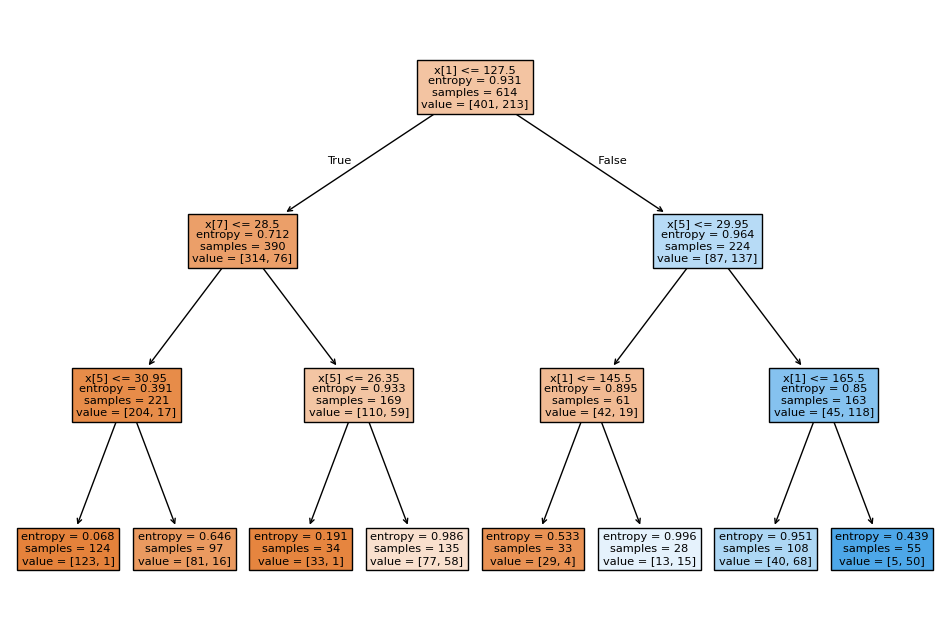

In [28]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_entro.fit(x_train, y_train), filled = True)
#print decison tree nya

In [32]:
#gini
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
clf_gini.fit(x_train, y_train)
#kode ini menunjukkan model klasifikasi decision tree

DecisionTreeClassifier(max_depth=3, random_state=0)

In [33]:
y_pred_gini = clf_gini.predict(x_test)

In [34]:
print('model accuracy score dengan criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

model accuracy score dengan criterion gini: 0.7597


In [35]:
print('training set score: {0:0.4f}' .format(clf_gini.score(x_train, y_train)))
print('test set score: {0:0.4f}' .format(clf_gini.score(x_test, y_test)))

training set score: 0.7769
test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

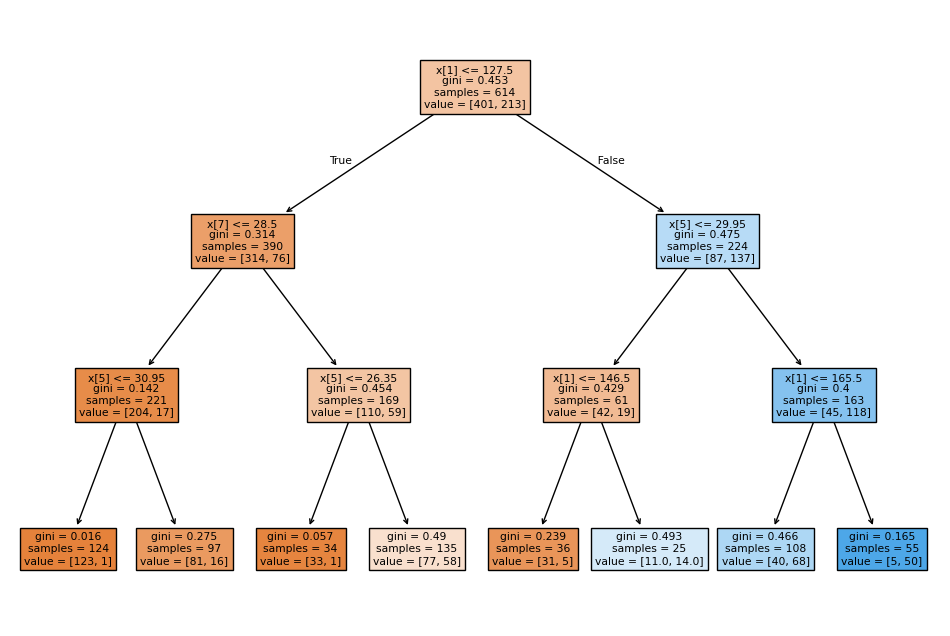

In [36]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train), filled = True)
#print decison tree nya

In [37]:
#naive bays
x_train = x_train.dropna()
y_train = y_train[x_train.index]

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [38]:
nb_y_pred = nb_classifier.predict(x_test)

In [39]:
print('accuracy score dengan GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))

accuracy score dengan GaussianNB: 0.8


In [42]:
gaus = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', gaus)

Confusion matrix GaussianNB: 
 [[79 20]
 [16 39]]


In [43]:
print('training set score: {0:0.4f}' .format(nb_classifier.score(x_train, y_train)))
print('test set score: {0:0.4f}' .format(nb_classifier.score(x_test, y_test)))

training set score: 0.7524
test set score: 0.7662


In [46]:
#classification report GaussianNB
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [47]:
print("Dari laporan tersebut, kami menyimpulkan bahwa skor akurasi adalah 0,77 / 77%. Precision, recall, dan f1-score memiliki skor di bawah akurasi")

Dari laporan tersebut, kami menyimpulkan bahwa skor akurasi adalah 0,77 / 77%. Precision, recall, dan f1-score memiliki skor di bawah akurasi


In [52]:
#KNN
# Inisialisasi dan latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Prediksi dan evaluasi
knn_predictions = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Akurasi KNN:", knn_accuracy)
print(classification_report(y_test, knn_predictions))

Akurasi KNN: 0.6623376623376623
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154

